In [1]:
import pandas as pd
import numpy as np
import os
import fasttext

In [2]:
DATA_HOME_DIR = "/lyceum/jhk1c21/msc_project/data"
FILTERED_DIR = os.path.join(DATA_HOME_DIR, "graph", "v14")

In [3]:
df = pd.read_csv(os.path.join(FILTERED_DIR, 'nodes_v14.csv'), index_col='_id')

In [4]:
fast_model = fasttext.load_model(os.path.join(DATA_HOME_DIR, 'cc.en.300.bin'))

In [5]:
domains_list = list(df['fos'])
domains_list = list(map(eval, domains_list))

In [6]:
domain_names = []
domain_weights = []
for domains in domains_list:
    tmp_name = []
    tmp_weight = []
    for domain in domains:
        tmp_name.append(domain['name'])
        tmp_weight.append(domain['w'])
    domain_names.append(tmp_name)
    domain_weights.append(tmp_weight)

In [33]:
len(domain_names)
# len(domain_weights)

162227

In [45]:
def word_list_embedding(model, keyword_list, keyword_weight=None):
    embeddings = [ np.array(list(map(model.get_word_vector, keywords))) for keywords in keyword_list ]
    if keyword_weight is None:
        return [ np.mean(keywords_embedding, axis=0) for keywords_embedding in embeddings ]
    else:
        keyword_weight_prop = []
        for weight in keyword_weight:
            keyword_weight_prop.append(weight/np.sum(weight))
        # print(np.sum(keyword_weight, axis=0))
        # keyword_weight = keyword_weight / np.sum(keyword_weight, axis=0)
        return [ np.average(keywords_embedding, axis=0, weights=keyword_weight_prop[i]) for i, keywords_embedding in enumerate(embeddings) ]

In [46]:
domains_embedding_list1 = word_list_embedding(fast_model, domain_names[:10], domain_weights[:10])
domains_embedding_list1

[array([-6.83996856e-03,  1.02390226e-02,  7.18792338e-03,  3.76513061e-02,
        -1.37702407e-03, -1.30282351e-02, -1.69582625e-03,  1.66458937e-03,
        -6.27896358e-03, -1.15362264e-02,  1.30683733e-02, -5.67887472e-03,
         6.32823112e-03,  4.89185771e-03, -1.51442241e-02,  5.60081803e-03,
         1.43004354e-02, -3.11590981e-03,  1.48294624e-02,  2.19935795e-02,
        -2.27339252e-02,  3.87221499e-03,  3.12226535e-03, -6.02161256e-03,
         3.06761835e-02,  2.29882021e-02,  8.49016529e-03,  1.04093659e-02,
         5.13953837e-03,  2.69059069e-02,  1.79706336e-03,  4.30389409e-04,
         4.44160681e-03,  3.45779805e-04,  1.59988179e-02,  7.26214400e-03,
        -8.04966272e-03,  1.49623238e-02,  2.26957104e-04,  1.52774136e-02,
        -4.14005634e-03, -1.22318782e-02, -3.00385268e-03,  2.18130549e-03,
        -1.72270399e-02,  3.32853228e-03, -1.68042338e-03,  8.92217022e-03,
        -1.89672291e-03, -2.58410431e-03,  8.62217255e-03, -1.95661044e-02,
         2.1

In [44]:
domains_embedding_list2 = word_list_embedding(fast_model, domain_names[:10], domain_weights[:10])
domains_embedding_list2

[array([-6.83996856e-03,  1.02390226e-02,  7.18792338e-03,  3.76513061e-02,
        -1.37702407e-03, -1.30282351e-02, -1.69582625e-03,  1.66458937e-03,
        -6.27896358e-03, -1.15362264e-02,  1.30683733e-02, -5.67887472e-03,
         6.32823112e-03,  4.89185771e-03, -1.51442241e-02,  5.60081803e-03,
         1.43004354e-02, -3.11590981e-03,  1.48294624e-02,  2.19935795e-02,
        -2.27339252e-02,  3.87221499e-03,  3.12226535e-03, -6.02161256e-03,
         3.06761835e-02,  2.29882021e-02,  8.49016529e-03,  1.04093659e-02,
         5.13953837e-03,  2.69059069e-02,  1.79706336e-03,  4.30389409e-04,
         4.44160681e-03,  3.45779805e-04,  1.59988179e-02,  7.26214400e-03,
        -8.04966272e-03,  1.49623238e-02,  2.26957104e-04,  1.52774136e-02,
        -4.14005634e-03, -1.22318782e-02, -3.00385268e-03,  2.18130549e-03,
        -1.72270399e-02,  3.32853228e-03, -1.68042338e-03,  8.92217022e-03,
        -1.89672291e-03, -2.58410431e-03,  8.62217255e-03, -1.95661044e-02,
         2.1

In [39]:
do = np.load(os.path.join(DATA_HOME_DIR, 'embedding', 'tmp', 'v14', 'tmp_domains_embedding.npy'))
ab = np.load(os.path.join(DATA_HOME_DIR, 'embedding', 'tmp', 'v14', 'tmp_keywords_embedding.npy'))
print(ab.shape, do.shape)

(162227, 300) (162227, 300)


In [56]:
idx = 8
domains_embedding_list2[idx] - domains_embedding_list1[idx]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [41]:
ab

array([[ 8.2111165e-02, -3.8176486e-01, -1.2654451e-01, ...,
         3.2859305e-01, -1.6349046e-01, -1.7899815e-02],
       [ 8.1962243e-02, -3.7569949e-01, -1.4045702e-01, ...,
         2.9763034e-01, -1.2882684e-01,  1.3066819e-02],
       [ 5.7485670e-02, -3.8886905e-01, -1.4255373e-01, ...,
         3.4520921e-01, -1.7541839e-01,  7.9497984e-03],
       ...,
       [ 5.2184176e-02, -3.8181946e-01, -1.4208597e-01, ...,
         3.6930451e-01, -1.4283340e-01, -2.4116242e-04],
       [ 2.6482489e-02, -4.0750122e-01, -1.4676635e-01, ...,
         3.4181601e-01, -1.9602500e-01,  1.1328806e-02],
       [ 4.2889003e-02, -3.8199320e-01, -1.6831723e-01, ...,
         3.7158638e-01, -2.4927171e-01,  1.7596630e-02]], dtype=float32)

In [59]:
DATA_HOME = "/lyceum/jhk1c21/msc_project/data"
FILTERED_PATH = os.path.join(DATA_HOME, "graph", "filtered")
df = pd.read_csv(os.path.join(FILTERED_PATH, "similarity.csv"))
df

,Unnamed: 0,title,abstract,keyword,domain
0,0,0.611711,0.292500,0.393569,0.997134
1,1,0.688125,0.228142,0.206670,0.991341
2,2,0.484088,0.328195,0.676533,0.996584
3,3,0.445873,0.584870,0.829723,0.998107
4,4,0.617348,0.395976,0.591966,0.992278
...,...,...,...,...,...
1408516,1408516,0.657276,0.562673,0.793045,0.995755
1408517,1408517,0.679655,0.712230,0.718943,0.996524
1408518,1408518,0.417301,0.517800,0.614112,0.995322
1408519,1408519,0.444667,0.654007,0.800967,0.997159


In [61]:
DATA_HOME = "/lyceum/jhk1c21/msc_project/data"
V14_PATH = os.path.join(DATA_HOME, "graph", "v14")

In [62]:
titles = np.load(os.path.join(V14_PATH, "filtered", 'title_embedding.npy'))
abstracts = np.load(os.path.join(V14_PATH, "filtered", 'abstract_embedding.npy'))
keywords = np.load(os.path.join(V14_PATH, "filtered", 'keywords_embedding.npy'))
domains = np.load(os.path.join(V14_PATH, "filtered", 'domains_embedding.npy'))

In [63]:
print(titles.shape, abstracts.shape, keywords.shape, domains.shape)

(162227, 300) (162207, 300) (162227, 300) (162227, 300)


In [1]:
import os
import numpy as np

In [2]:
DATA_HOME = "/lyceum/jhk1c21/msc_project/data"
V14_PATH = os.path.join(DATA_HOME, "graph", "v14")
# TMP_PATH = os.path.join(DATA_HOME, "embedding", "tmp", "v14")

# Load the data
# nodes = pd.read_csv(os.path.join(FILTERED_PATH, "filtered_nodes.csv"), index_col='_id')

titles = np.load(os.path.join(V14_PATH, "filtered", 'title_embedding.npy'))
abstracts = np.load(os.path.join(V14_PATH, "filtered", 'abstract_embedding.npy'))
keywords = np.load(os.path.join(V14_PATH, "filtered", 'keywords_embedding.npy'))
domains = np.load(os.path.join(V14_PATH, "filtered", 'domains_embedding.npy'))

ids = np.load(os.path.join(V14_PATH, "filtered", "filtered_id.npy"))
edges = np.load(os.path.join(V14_PATH, "filtered", 'filtered_edge.npy'))

In [19]:
import pandas as pd

In [89]:
df = pd.read_csv(os.path.join(V14_PATH, "nodes_v14.csv"), index_col='id')
sim_df = pd.read_csv(os.path.join(V14_PATH, "filtered", "similarity_edges.csv"))
ids = np.load(os.path.join(V14_PATH, "filtered", "filtered_id.npy"))
edges = np.load(os.path.join(V14_PATH, "filtered", "filtered_edge.npy"))

In [90]:
sim_df

,src,dst,title,abstract,keyword,domain
0,53e99beab7602d9702497a80,53e9a4c0b7602d9702ddf482,0.470632,0.124602,0.634944,0.445128
1,53e9a1d5b7602d9702ad2aa6,558aec6284ae84d265c0707c,0.363818,0.738057,0.825033,0.803241
2,53e9abc9b7602d970357a86b,557d23366feeaa8086da70ff,0.549633,0.203248,0.594433,0.879736
3,53e9b708b7602d970429d764,53e9b5d4b7602d97041251f3,0.600002,0.239508,0.842274,0.688702
4,53e9bc1bb7602d9704883a9c,53e9ba39b7602d9704648483,0.568734,0.682352,0.832233,0.852411
...,...,...,...,...,...,...
1273170,53e9ad47b7602d970372c2bd,53e9ab6fb7602d970350e269,0.684507,0.129349,0.513802,0.881588
1273171,53e9abf1b7602d97035afe55,53e9aa79b7602d97033ef136,0.524307,0.402008,0.199441,0.722187
1273172,5a260c2e17c44a4ba8a24152,53e99b31b7602d97023ce813,0.499875,0.309166,0.822491,0.854233
1273173,599c77fa601a182cd2590dbc,53e9b903b7602d97044e594e,0.525179,0.415119,0.722028,0.705364


"['53e9a1d5b7602d9702ad2aa6' '558aec6284ae84d265c0707c']"

In [103]:
w1, w2, w3, w4 = 0.25, 0.15, 0.2, 0.4
sim_df['weighted_similarity'] = w1*sim_df['title'] + w2*sim_df['abstract'] + w3*sim_df['keyword'] + w4*(1-sim_df['domain'])
sim_df

,src,dst,title,abstract,keyword,domain,total_similarity,weighted_similarity
0,53e99beab7602d9702497a80,53e9a4c0b7602d9702ddf482,0.470632,0.124602,0.634944,0.445128,1.785049,0.485286
1,53e9a1d5b7602d9702ad2aa6,558aec6284ae84d265c0707c,0.363818,0.738057,0.825033,0.803241,2.123666,0.445373
2,53e9abc9b7602d970357a86b,557d23366feeaa8086da70ff,0.549633,0.203248,0.594433,0.879736,1.467579,0.334888
3,53e9b708b7602d970429d764,53e9b5d4b7602d97041251f3,0.600002,0.239508,0.842274,0.688702,1.993082,0.478901
4,53e9bc1bb7602d9704883a9c,53e9ba39b7602d9704648483,0.568734,0.682352,0.832233,0.852411,2.230908,0.470019
...,...,...,...,...,...,...,...,...
1273170,53e9ad47b7602d970372c2bd,53e9ab6fb7602d970350e269,0.684507,0.129349,0.513802,0.881588,1.446070,0.340654
1273171,53e9abf1b7602d97035afe55,53e9aa79b7602d97033ef136,0.524307,0.402008,0.199441,0.722187,1.403569,0.342391
1273172,5a260c2e17c44a4ba8a24152,53e99b31b7602d97023ce813,0.499875,0.309166,0.822491,0.854233,1.777298,0.394148
1273173,599c77fa601a182cd2590dbc,53e9b903b7602d97044e594e,0.525179,0.415119,0.722028,0.705364,1.956962,0.455823


In [105]:
sim_df[sim_df['src'] == '53e9a3fbb7602d9702d1562f'].sort_values('weighted_similarity', ascending=False)

,src,dst,title,abstract,keyword,domain,total_similarity,weighted_similarity
44739,53e9a3fbb7602d9702d1562f,53e9a88db7602d97031dddf6,0.592678,0.403268,0.623555,0.263538,2.355962,0.627955
598962,53e9a3fbb7602d9702d1562f,53e9b13eb7602d9703bc3852,0.653563,0.395057,0.874078,0.645895,2.276803,0.539107
1032288,53e9a3fbb7602d9702d1562f,53e9a0c2b7602d97029a89a6,0.570052,0.791220,0.748184,0.751418,2.358038,0.510266
397877,53e9a3fbb7602d9702d1562f,53e9afdbb7602d9703a317d7,0.595262,0.381676,0.849448,0.678119,2.148267,0.504709
20950,53e9a3fbb7602d9702d1562f,53e99938b7602d9702178ab4,0.622820,0.413275,0.865416,0.722680,2.178831,0.501707
432693,53e9a3fbb7602d9702d1562f,53e99a4eb7602d97022ae74e,0.340726,0.322019,0.449743,0.343950,1.768538,0.485853
773318,53e9a3fbb7602d9702d1562f,53e9a1d0b7602d9702acbf4a,0.520382,0.037307,0.701427,0.479829,1.779286,0.484045
479703,53e9a3fbb7602d9702d1562f,53e9bd98b7602d9704a427e7,0.449101,0.099935,0.591123,0.778614,1.361545,0.334044


In [106]:
sim_df[sim_df['src'] == '53e99cafb7602d9702563265'].sort_values('total_similarity', ascending=False).head(30)

,src,dst,title,abstract,keyword,domain,total_similarity,weighted_similarity
1170601,53e99cafb7602d9702563265,53e9ad7cb7602d970376d528,0.883301,0.984143,0.957273,0.441159,3.383558,0.783438
710550,53e99cafb7602d9702563265,53e9a6f5b7602d970302a39c,0.702799,0.962543,0.562458,0.836526,2.391275,0.497963
895866,53e99cafb7602d9702563265,53e9b188b7602d9703c0ee19,0.333022,0.951817,0.568545,0.621195,2.232188,0.491259
35164,53e99cafb7602d9702563265,53e99aedb7602d970237a144,0.333283,0.856526,0.572633,0.864214,1.898227,0.380640


ConversionError: Failed to convert value(s) to axis units: array(['Soft objects change shape as they move. Specifying such changes is a complicated task which has received little attention in the literature largely because, until recently, we had no adequate way to represent such objects.',
       'In this paper, attribute grammars are viewed as specifying translations from source language terms into target language terms. The terms are constructed over a hierarchical signature consisting of a semantic and a syntactic part. Attribute grammars are redefined to become morphisms in the category of such signatures, called attribute coupled grammars, such that they come with an associative composition operation. The composition allows for a new kind of modularity in compiler specifications. The paper also discusses properties of the concept with respect to attribute evaluation and application as a tree transformation device.\n\n',
       'This paper identifies and describes a number of misconceptions observed in students learning about object technology. It identifies simple, concrete, measures course designers and teachers can take to avoid these misconceptions arising. The context for this work centres on an introductory undergraduate course and a postgraduate course. Both these courses are taught by distance education. These courses both use Smalltalk as an introduction to object technology. More particularly, the undergraduate course uses Smalltalk as a first programming language.Distance education can limit the amount and speed of individual feedback that can be given in the early stages of learning. For this reason, particular attention has been paid to characterizing measures for avoiding elementary misconceptions seen in beginning learners. At the same time we also address some misconceptions observed in postgraduate students. The pedagogical issues discussed are of particular importance when devising an extended series of examples for teaching or assessment, or when designing a visual microworld to be used for teaching purposes.\n\n',
       ...,
       'In recent years, rapid technological advancements in smart devices and their usage in a wide range of applications exponentially increases the data generated from these devices. So, the traditional data analytics techniques may not be able to handle this extreme volume of data known as Big Data (BD) generated by different devices. However, this exponential increase of data opens the doors for the different type of attackers to launch various attacks by exploiting various vulnerabilities (SQL injection, OS fingerprinting, malicious code execution, etc.) during data analytics. Motivated from the aforementioned discussion, in this paper, we explored Machine Learning (ML) and Deep Learning (DL)-based models and techniques which are capable off to identify and mitigate both the known as well as unknown attacks. ML and DL-based techniques have the capabilities to learn from the traffic pattern using training and testing datasets in the extensive network domains to make intelligent decisions concerning attack identification and mitigation. We also proposed a DL and ML-based Secure Data Analytics (SDA) architecture to classify normal or attack input data. A detailed taxonomy of SDA is abstracted into a threat model. This threat model addresses various research challenges in SDA using multiple parameters such as-efficiency, latency, accuracy, reliability, and attacks launched by the attackers. Finally, a comparison of existing SDA proposals with respect to various parameters is presented, which allows the end users to select one of the SDA proposals in comparison to its merits over the others.',
       'The fifth generation of wireless communications (5G) promises massive increases in traffic volume and data rates, as well as improved reliability in voice calls. Jointly optimizing beamforming, power control, and interference coordination in a 5G wireless network to enhance the communication performance to end users poses a significant challenge. In this paper, we formulate the joint design of beamforming, power control, and interference coordination as a non-convex optimization problem to maximize the signal to interference plus noise ratio (SINR) and solve this problem using deep reinforcement learning. By using the greedy nature of deep Q-learning to estimate future rewards of actions and using the reported coordinates of the users served by the network, we propose an algorithm for voice bearers and data bearers in sub-6 GHz and millimeter wave (mmWave) frequency bands, respectively. The algorithm improves the performance measured by SINR and sum-rate capacity. In realistic cellular environments, the simulation results show that our algorithm outperforms the link adaptation industry standards for sub-6 GHz voice bearers. For data bearers in the mmWave frequency band, our algorithm approaches the maximum sum rate capacity, but with less than 4% of the required run time.',
       'Neural network configurations with random weights play an important role in the analysis of deep learning. They define the initial loss landscape and are closely related to kernel and random feature methods. Despite the fact that these networks are built out of random matrices, the vast and powerful machinery of random matrix theory has so far found limited success in studying them. A main obstacle in this direction is that neural networks are nonlinear, which prevents the straightforward utilization of many of the existing mathematical results. In this work, we open the door for direct applications of random matrix theory to deep learning by demonstrating that the pointwise nonlinearities typically applied in neural networks can be incorporated into a standard method of proof in random matrix theory known as the moments method. The test case for our study is the Gram matrix FFT, F = f(WX), where W is a random weight matrix, X is a random data matrix, and f is a pointwise nonlinear activation function. We derive an explicit representation for the trace of the resolvent of this matrix, which defines its limiting spectral distribution. We apply these results to the computation of the asymptotic performance of single-layer random feature networks on a memorization task and to the analysis of the eigenvalues of the data covariance matrix as it propagates through a neural network. As a byproduct of our analysis, we identify an intriguing new class of activation functions with favorable properties.'],
      dtype=object)

Error in callback <function _draw_all_if_interactive at 0x2b11fbac6290> (for post_execute):


KeyboardInterrupt: 

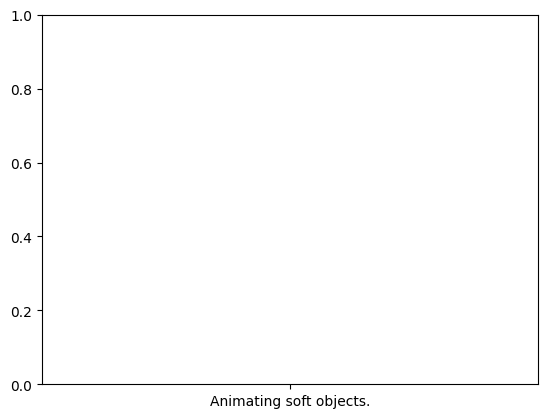

In [111]:
import seaborn as sns

In [112]:
!pip install seaborn